# Takes lsgkm trained model, training negatives and test positives and generates IG importance scores

In [1]:
!./grab_data.sh

--2018-08-05 23:32:50--  https://github.com/evaprakash/lsgkm/blob/master/ziptalgata.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/evaprakash/lsgkm/raw/master/ziptalgata.zip [following]
--2018-08-05 23:32:50--  https://github.com/evaprakash/lsgkm/raw/master/ziptalgata.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evaprakash/lsgkm/master/ziptalgata.zip [following]
--2018-08-05 23:32:50--  https://raw.githubusercontent.com/evaprakash/lsgkm/master/ziptalgata.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87412991 (8

### One hot encode methods for FASTA sequences

In [2]:
import numpy as np

def one_hot_encode_along_channel_axis(input_zeros_array, sequence):
    #theano dim ordering, uses row axis for one-hot
    seq_to_one_hot_fill_in_array(zeros_array=input_zeros_array,
                                 sequence=sequence, one_hot_axis=1)
    return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            

### Read lsgkm trained model file, extract alphas and support vectors, and then one hot encode them

In [3]:
modelfile = 'talgatatrained_t3_l6_k5_d0_g1.0_c100.txt'
with open(modelfile) as fp: 
    #Ignore all lines until you see 'SV'
    nextline = ''
    while (nextline != 'SV'):
        if nextline.startswith('gamma'):
            (word, gamma) = nextline.split()
            gamma = float(gamma)
            print("Gamma is ", gamma)
        nextline = fp.readline().strip()
    #Then capture all lines (of the form '<alpha-value> <sequence>')
    lines = np.array([line for line in fp])
    fp.close()
print lines.shape
# Get sequence size (assumed same for all)
size = len(lines[0].split()[1])
print size
# Capture alphas separately
alphas = np.array([float(line.split()[0]) for line in lines])
# Initialize array that will contain one-hot encoding
onehotsvs = np.zeros((lines.shape[0], size, 4), dtype=np.int8)
i=0
# Now go through lines, encoding the svs
for line in lines:
    seq = line.split()[1]
    one_hot_encode_along_channel_axis(onehotsvs[i], seq)
    i = i+1
print(onehotsvs[0])
print(onehotsvs[1])

('Gamma is ', 1.0)
(62395,)
200
[[1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]


### Calculate gkmers

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
!echo $CUDA_VISIBLE_DEVICES

0


In [5]:
import ssvmimp
import ssvmimp.train

max_mismatches=0

filters, string_reps, embedding_func = ssvmimp.train.get_gapped_kmer_embedding_filters_and_func(
                                kmer_len=6, alphabet=['A','C','G','T'],
                                num_gaps=1, max_mismatches=max_mismatches)

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN not available)


In [6]:
print("Number of filters:",len(string_reps))
print("First ten filters:")
print("\n".join(string_reps[:10]))
print("Last ten filters:")
print("\n".join(string_reps[-10:]))

('Number of filters:', 5120)
First ten filters:
AAAAA 
AAAAC 
AAAAG 
AAAAT 
AAACA 
AAACC 
AAACG 
AAACT 
AAAGA 
AAAGC 
Last ten filters:
T TTCG
T TTCT
T TTGA
T TTGC
T TTGG
T TTGT
T TTTA
T TTTC
T TTTG
T TTTT


### Get gkmer based feature count for support vectors and normalize

In [7]:
sv_embeddings = embedding_func(onehot=onehotsvs, batch_size=20, progress_update=500)
sv_normalized_embeddings = (sv_embeddings/
                         np.linalg.norm(sv_embeddings, axis=1)[:,None])
print("Shape of the embeddings matrix:", sv_embeddings.shape)
print("Shape of the normalized embeddings matrix:", sv_normalized_embeddings.shape)
print(sv_normalized_embeddings)

Done 0
Done 500
Done 1000
Done 1500
Done 2000
Done 2500
Done 3000
Done 3500
Done 4000
Done 4500
Done 5000
Done 5500
Done 6000
Done 6500
Done 7000
Done 7500
Done 8000
Done 8500
Done 9000
Done 9500
Done 10000
Done 10500
Done 11000
Done 11500
Done 12000
Done 12500
Done 13000
Done 13500
Done 14000
Done 14500
Done 15000
Done 15500
Done 16000
Done 16500
Done 17000
Done 17500
Done 18000
Done 18500
Done 19000
Done 19500
Done 20000
Done 20500
Done 21000
Done 21500
Done 22000
Done 22500
Done 23000
Done 23500
Done 24000
Done 24500
Done 25000
Done 25500
Done 26000
Done 26500
Done 27000
Done 27500
Done 28000
Done 28500
Done 29000
Done 29500
Done 30000
Done 30500
Done 31000
Done 31500
Done 32000
Done 32500
Done 33000
Done 33500
Done 34000
Done 34500
Done 35000
Done 35500
Done 36000
Done 36500
Done 37000
Done 37500
Done 38000
Done 38500
Done 39000
Done 39500
Done 40000
Done 40500
Done 41000
Done 41500
Done 42000
Done 42500
Done 43000
Done 43500
Done 44000
Done 44500
Done 45000
Done 45500
Done 46000
D

### Read the negative training points, one hot encode them, get feature counts, normalize and average to get mean background reference

In [8]:
import numpy.core.defchararray as npdef

def get_and_process_sequences_from_fasta_file(filename, limit=None):
    with open(filename) as fp:
        alllines = np.array([line.strip() for line in fp])
        fp.close()    
    seq_indices = np.nonzero(npdef.startswith(alllines, '>') == False)[0]
    sequences = alllines[seq_indices]
    if (limit is not None):
        sequences = sequences[:limit]
    size = len(sequences[0])
    print("Got ", sequences.shape[0], " sequences of size ", size)
    onehotseqs = np.zeros((sequences.shape[0], size, 4), dtype=np.int8)
    print("One hot seqs shape is ", onehotseqs.shape)
    i=0
    for seq in sequences:
        one_hot_encode_along_channel_axis(onehotseqs[i], seq)
        i = i+1
    seq_embeddings = embedding_func(onehot=onehotseqs, batch_size=20, progress_update=500)
    print("Embeddings shape is ", seq_embeddings.shape)
    seq_normalized_embeddings = (seq_embeddings/
                         np.linalg.norm(seq_embeddings, axis=1)[:,None])
    print("Normalized embeddings is ", seq_normalized_embeddings)
    return onehotseqs, seq_normalized_embeddings

In [9]:
neg_training_seqs, neg_training_normalized_embeddings = get_and_process_sequences_from_fasta_file('talgata_trainnegatives.fa')
average_neg_training_point = np.average(neg_training_normalized_embeddings, axis=0)
print("Average neg training point is ", average_neg_training_point)

('Got ', 50000, ' sequences of size ', 200)
('One hot seqs shape is ', (50000, 200, 4))
Done 0
Done 500
Done 1000
Done 1500
Done 2000
Done 2500
Done 3000
Done 3500
Done 4000
Done 4500
Done 5000
Done 5500
Done 6000
Done 6500
Done 7000
Done 7500
Done 8000
Done 8500
Done 9000
Done 9500
Done 10000
Done 10500
Done 11000
Done 11500
Done 12000
Done 12500
Done 13000
Done 13500
Done 14000
Done 14500
Done 15000
Done 15500
Done 16000
Done 16500
Done 17000
Done 17500
Done 18000
Done 18500
Done 19000
Done 19500
Done 20000
Done 20500
Done 21000
Done 21500
Done 22000
Done 22500
Done 23000
Done 23500
Done 24000
Done 24500
Done 25000
Done 25500
Done 26000
Done 26500
Done 27000
Done 27500
Done 28000
Done 28500
Done 29000
Done 29500
Done 30000
Done 30500
Done 31000
Done 31500
Done 32000
Done 32500
Done 33000
Done 33500
Done 34000
Done 34500
Done 35000
Done 35500
Done 36000
Done 36500
Done 37000
Done 37500
Done 38000
Done 38500
Done 39000
Done 39500
Done 40000
Done 40500
Done 41000
Done 41500
Done 42000
D

### Read positive test points, one hot encode them, get feature counts and normalize

In [10]:
pos_test_seqs, pos_test_normalized_embeddings = get_and_process_sequences_from_fasta_file('talgata_testpositives.fa', limit=1000)

('Got ', 1000, ' sequences of size ', 200)
('One hot seqs shape is ', (1000, 200, 4))
Done 0
Done 500
('Embeddings shape is ', (1000, 5120))
('Normalized embeddings is ', array([[ 0.06043978,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.02895208,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.0582964 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.02904965,  0.        , ...,  0.02904965,
         0.02904965,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32))


### Calculate IG importance scores of positive test sequences and save scores to file
### Note: Can skip this step if files already saved to disk, since this step takes long to execute

In [ ]:
import time
import ssvmimp.imp_scores_helper_lsgkm
reload(ssvmimp.imp_scores_helper_lsgkm)
from ssvmimp.imp_scores_helper_lsgkm import ImportanceScoresHelperLsgkm

start = time.time()
imp_scores_helper = ImportanceScoresHelperLsgkm(support_vectors=sv_normalized_embeddings, gamma=gamma, alphas=alphas)
imp_scores, avg_grads = imp_scores_helper.get_feature_contribs_using_average_gradient_from_reference(
    testpoints=pos_test_normalized_embeddings, 
    reference_points=[average_neg_training_point for x in range(pos_test_normalized_embeddings.shape[0])],
    numsteps=10)
print("Importance scores computed in:", round(time.time() - start, 2), "s")
np.save("talgata_impscores_k6_gap1_gamma1_1000points.npy", imp_scores)
np.save("talgata_avggrads_k6_gap1_gamma1_1000points.npy", avg_grads)


Starting average gradient calculation for  1 th point
Starting average gradient calculation for  2 th point
Starting average gradient calculation for  3 th point
Starting average gradient calculation for  4 th point
Starting average gradient calculation for  5 th point
Starting average gradient calculation for  6 th point
Starting average gradient calculation for  7 th point
Starting average gradient calculation for  8 th point
Starting average gradient calculation for  9 th point
Starting average gradient calculation for  10 th point
Starting average gradient calculation for  11 th point
Starting average gradient calculation for  12 th point
Starting average gradient calculation for  13 th point
Starting average gradient calculation for  14 th point
Starting average gradient calculation for  15 th point
Starting average gradient calculation for  16 th point
Starting average gradient calculation for  17 th point
Starting average gradient calculation for  18 th point
Starting average gr

### Reload imp scores and avg grad from file

In [11]:
import ssvmimp.backend.theano_backend
reload(ssvmimp.backend.theano_backend)
import ssvmimp.backend
reload(ssvmimp.backend)

imp_scores = np.load("talgata_impscores_k6_gap1_gamma1_1000points.npy")
avg_grads = np.load("talgata_avggrads_k6_gap1_gamma1_1000points.npy")

interpretation_func = ssvmimp.backend.get_interpretation_func_dynamic_filter_imp(
                            filters=filters)
hyp_imp_func = ssvmimp.backend.get_interpretation_func_dynamic_hyp_contribs(
                            filters=filters)

### Distribute feature count scores onto original sequences

In [12]:
final_importance_scores = interpretation_func(
                    onehot=pos_test_seqs,
                    filter_grad=imp_scores,
                    batch_size=20, progress_update=20)
print(final_importance_scores.shape)
final_hyp_scores = hyp_imp_func(
                    onehot=pos_test_seqs,
                    filter_grad=avg_grads,
                    batch_size=20, progress_update=100)
final_hyp_scores = final_hyp_scores-np.mean(final_hyp_scores,axis=-1)[:,:,None]
print(final_hyp_scores.shape)

Done 0
Done 20
Done 40
Done 60
Done 80
Done 100
Done 120
Done 140
Done 160
Done 180
Done 200
Done 220
Done 240
Done 260
Done 280
Done 300
Done 320
Done 340
Done 360
Done 380
Done 400
Done 420
Done 440
Done 460
Done 480
Done 500
Done 520
Done 540
Done 560
Done 580
Done 600
Done 620
Done 640
Done 660
Done 680
Done 700
Done 720
Done 740
Done 760
Done 780
Done 800
Done 820
Done 840
Done 860
Done 880
Done 900
Done 920
Done 940
Done 960
Done 980
(1000, 200, 4)
Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
(1000, 200, 4)


### Display some of the scores and corresponding hypothetical scores

('Example', 0)
Importance scores:


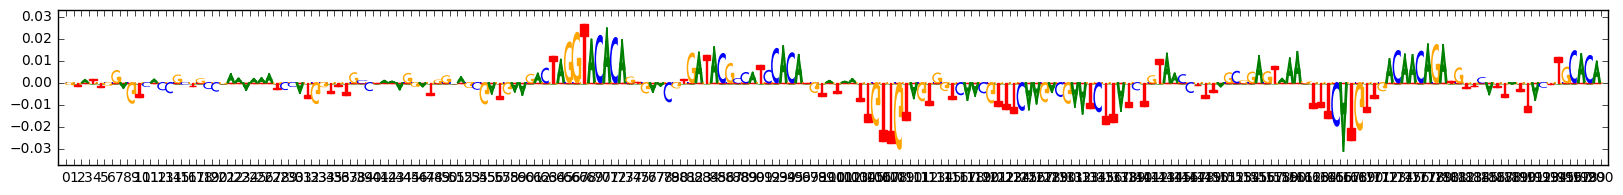

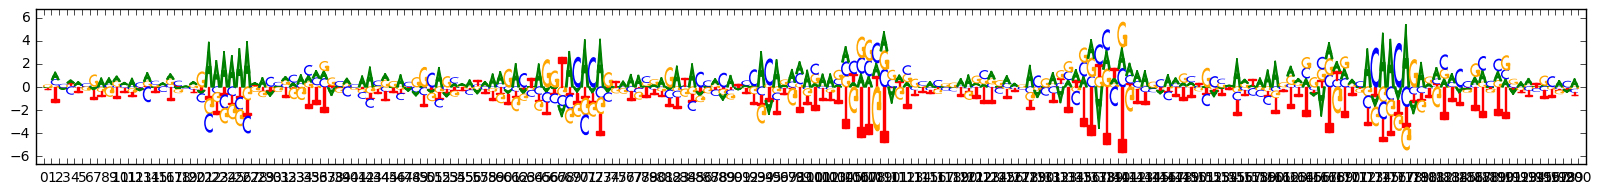

('Example', 1)
Importance scores:


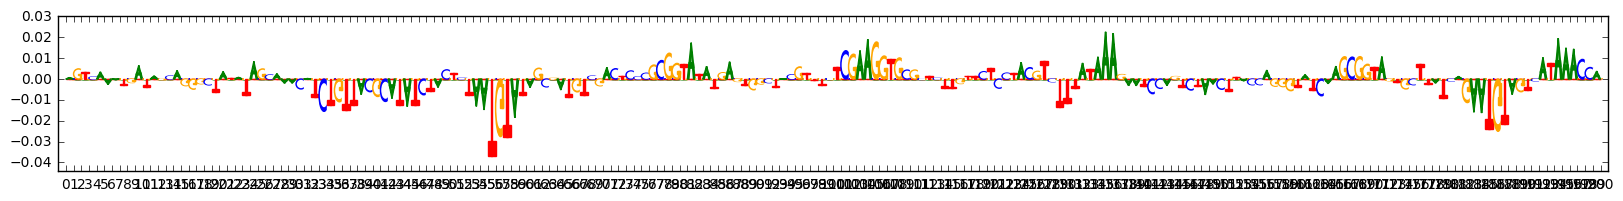

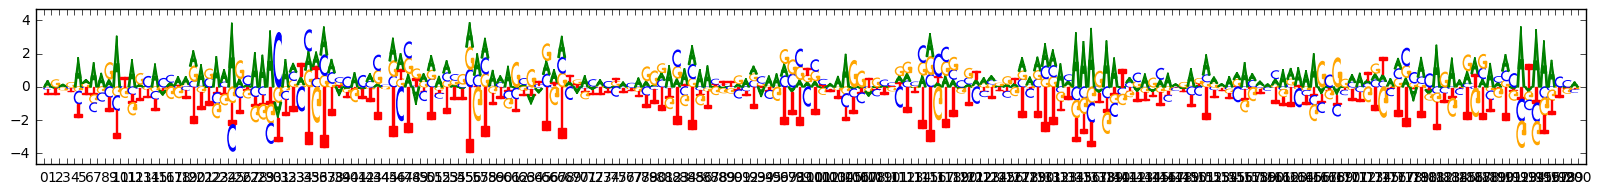

('Example', 2)
Importance scores:


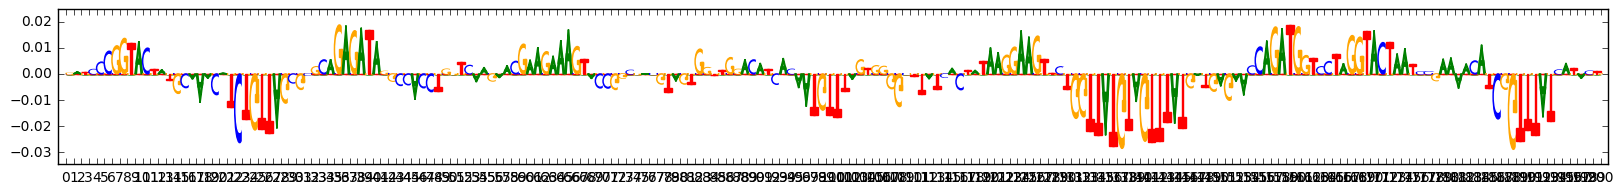

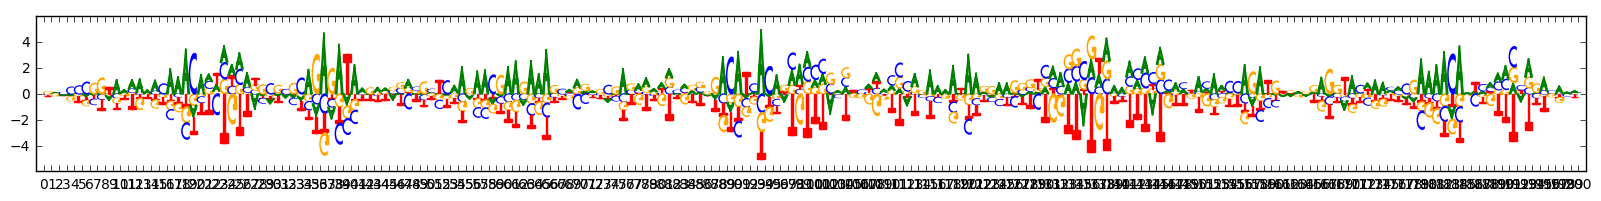

In [13]:
import ssvmimp.viz_sequence

for i,(imp_scores_for_seq, hyp_scores_for_seq) in enumerate(zip(final_importance_scores[:3],
                         final_hyp_scores[:3])):
    print("Example",i)
    print("Importance scores:")
    ssvmimp.viz_sequence.plot_weights(imp_scores_for_seq)
    ssvmimp.viz_sequence.plot_weights(hyp_scores_for_seq)

In [14]:
np.save("talgata_final_impscores_k6_gap1_gamma1_1000points.npy", final_importance_scores)
np.save("talgata_final_hyp_contribs_k6_gap1_gamma1_1000points.npy", final_hyp_scores)
np.save("one_hot_data_for_impscores.npy", pos_test_seqs)